In [19]:
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

%matplotlib inline

In [20]:
tayko_df = dmba.load_data('Tayko.csv')
tayko_df

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,128
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127
3,4,1,0,1,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0
4,5,1,0,1,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,0,0,0,0,0,0,0,0,...,0,0,1,1701,1701,1,0,0,1,30
1996,1997,1,0,0,0,0,0,0,0,0,...,0,0,1,2633,2633,1,1,0,1,10
1997,1998,1,0,0,0,0,0,0,0,0,...,0,0,0,3394,3394,0,0,0,0,0
1998,1999,1,0,0,0,0,0,0,0,0,...,0,1,1,253,253,0,1,1,0,0


In [21]:
tayko_df = tayko_df.drop(columns=['source_a', 'source_c', 'source_b', 'source_d', 'source_e', 'source_m', 'source_o', 'source_h', 'source_r', 'source_s', 'source_t', 'source_u', 'source_p', 'source_x', 'source_w'])
tayko_df = tayko_df.drop(columns=['sequence_number', '1st_update_days_ago', 'Purchase'])

In [22]:
tayko_df

,US,Freq,last_update_days_ago,Web order,Gender=male,Address_is_res,Spending
0,1,2,3662,1,0,1,128
1,1,0,2900,1,1,0,0
2,1,2,3883,0,0,0,127
3,1,1,829,0,1,0,0
4,1,1,869,0,0,0,0
...,...,...,...,...,...,...,...
1995,1,1,1701,1,0,0,30
1996,1,1,2633,1,1,0,10
1997,1,0,3394,0,0,0,0
1998,1,1,253,0,1,1,0


In [48]:
us_df = tayko_df.drop(columns=['Freq', 'last_update_days_ago', 'Web order', 'Gender=male', 'Address_is_res'])
freq_df = tayko_df.drop(columns=['US', 'last_update_days_ago', 'Web order', 'Gender=male', 'Address_is_res'])
webOrder_df = tayko_df.drop(columns=['Freq', 'last_update_days_ago', 'US', 'Gender=male', 'Address_is_res'])
gender_df = tayko_df.drop(columns=['Freq', 'last_update_days_ago', 'Web order', 'US', 'Address_is_res'])
address_df = tayko_df.drop(columns=['Freq', 'last_update_days_ago', 'Web order', 'Gender=male', 'US'])
lastUpdate_df = tayko_df.drop(columns=['Freq', 'US', 'Web order', 'Gender=male', 'Address_is_res'])

us_df

,US,Spending
0,1,128
1,1,0
2,1,127
3,1,0
4,1,0
...,...,...
1995,1,30
1996,1,10
1997,1,0
1998,1,0


In [49]:
US = pd.concat([us_df.groupby(["US"]).mean(), us_df.groupby(["US"]).std()], axis=1)
US.columns.values[0] = "mean"
US.columns.values[1] = "std"
US

,mean,std
US,,
0,101.216524,174.844401
1,102.924803,189.275664


In [50]:
Freq = pd.concat([freq_df.groupby(["Freq"]).mean(), freq_df.groupby(["Freq"]).std()], axis=1)
Freq.columns.values[0] = "mean"
Freq.columns.values[1] = "std"
Freq

,mean,std
Freq,,
0,0.000000,0.000000
1,66.322476,104.424412
2,123.479714,151.509696
3,234.993243,226.259754
4,306.061224,165.153642
5,459.862069,270.661719
6,556.750000,344.195009
7,642.125000,520.126478
8,933.500000,324.925120


In [51]:
webOrder = pd.concat([webOrder_df.groupby(["Web order"]).mean(), webOrder_df.groupby(["Web order"]).std()], axis=1)
webOrder.columns.values[0] = "mean"
webOrder.columns.values[1] = "std"
webOrder

,mean,std
Web order,,
0,82.902439,173.417088
1,129.199531,200.463840


In [52]:
Gender = pd.concat([gender_df.groupby(["Gender=male"]).mean(), gender_df.groupby(["Gender=male"]).std()], axis=1)
Gender.columns.values[0] = "mean"
Gender.columns.values[1] = "std"
Gender

,mean,std
Gender=male,,
0,107.339642,190.83233
1,98.350810,183.02006


In [53]:
Address = pd.concat([address_df.groupby(["Address_is_res"]).mean(), address_df.groupby(["Address_is_res"]).std()], axis=1)
Address.columns.values[0] = "mean"
Address.columns.values[1] = "std"
Address

,mean,std
Address_is_res,,
0,105.306162,199.521159
1,93.174208,132.204281


In [54]:
lastUpdate = pd.concat([lastUpdate_df.groupby(["last_update_days_ago"]).mean(), lastUpdate_df.groupby(["last_update_days_ago"]).std()], axis=1)
lastUpdate.columns.values[0] = "mean"
lastUpdate.columns.values[1] = "std"
lastUpdate

,mean,std
last_update_days_ago,,
1,109.000000,NaN
7,129.000000,NaN
9,196.000000,NaN
14,303.000000,NaN
15,71.000000,100.409163
...,...,...
4065,64.750000,58.987993
4096,75.666667,93.681731
4127,17.500000,24.748737


<Axes: xlabel='Freq', ylabel='Spending'>

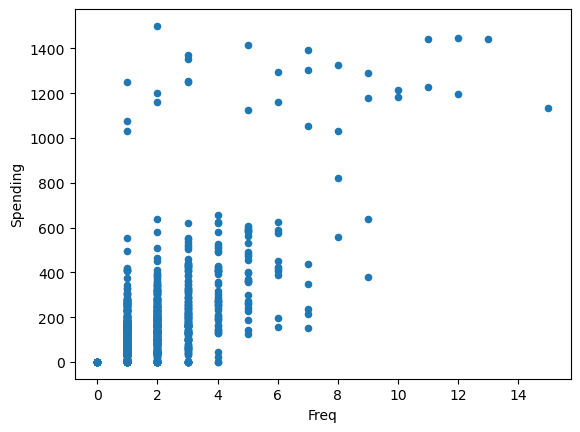

In [55]:
tayko_df.plot.scatter(x='Freq', y='Spending', legend=False)

<Axes: xlabel='last_update_days_ago', ylabel='Spending'>

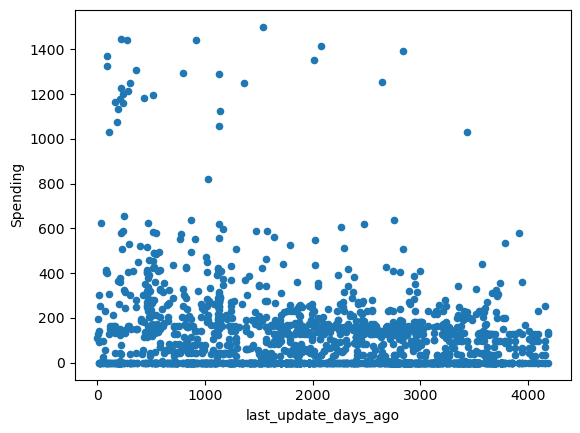

In [56]:
tayko_df.plot.scatter(x='last_update_days_ago', y='Spending', legend=False)

In [59]:
predictors = ['US', 'Freq', 'last_update_days_ago', 'Web order', 'Gender=male', 'Address_is_res']
outcome = 'Spending'

X = pd.get_dummies(tayko_df[predictors], drop_first=True)
y = tayko_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

tayko_lm = LinearRegression()
tayko_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', tayko_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': tayko_lm.coef_}))

# print performance measures
regressionSummary(train_y, tayko_lm.predict(train_X))

intercept  10.176297414607475
              Predictor  coefficient
0                    US    -4.620293
1                  Freq    91.274450
2  last_update_days_ago    -0.010374
3             Web order    18.628731
4           Gender=male    -9.111366
5        Address_is_res   -75.815354

Regression statistics

               Mean Error (ME) : -0.0000
Root Mean Squared Error (RMSE) : 125.9999
     Mean Absolute Error (MAE) : 79.4772


In [60]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: US, Freq, last_update_days_ago, Web order, Gender=male, Address_is_res
Start: score=15028.53
Step: score=15026.76, remove US
Step: score=15026.38, remove Gender=male
Step: score=15026.38, remove None
['Freq', 'last_update_days_ago', 'Web order', 'Address_is_res']


In [61]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

               Mean Error (ME) : 6.9616
Root Mean Squared Error (RMSE) : 136.5274
     Mean Absolute Error (MAE) : 83.4472


In [62]:
# Use predict() to make predictions on a new set
tayko_lm_pred = tayko_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': tayko_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - tayko_lm_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y, tayko_lm_pred)

       Predicted  Actual     Residual
674    89.214915       0   -89.214915
1699  202.231362     184   -18.231362
1282   49.159303       0   -49.159303
1315  824.841659    1289   464.158341
1210    0.121196       0    -0.121196
1636   86.766675       0   -86.766675
613    58.018614       0   -58.018614
447   247.428569    1255  1007.571431
1131   67.036615       0   -67.036615
808    67.825031       0   -67.825031
1496   -7.098168       0     7.098168
1468  194.814024     411   216.185976
1682  -13.480101       0    13.480101
1149  -32.457046       0    32.457046
442    61.247979       0   -61.247979
1813    4.497885     173   168.502115
654   -46.046854       0    46.046854
1264  -32.315195       0    32.315195
858    80.219048       0   -80.219048
1482   51.783900       0   -51.783900

Regression statistics

               Mean Error (ME) : 7.1933
Root Mean Squared Error (RMSE) : 136.7397
     Mean Absolute Error (MAE) : 83.6010


In [78]:
tayko_lm_pred = tayko_lm.predict(valid_X)
all_residuals = valid_y - tayko_lm_pred

print(len(all_residuals[(all_residuals > -100) & (all_residuals < 100)]) / len(all_residuals))

0.775


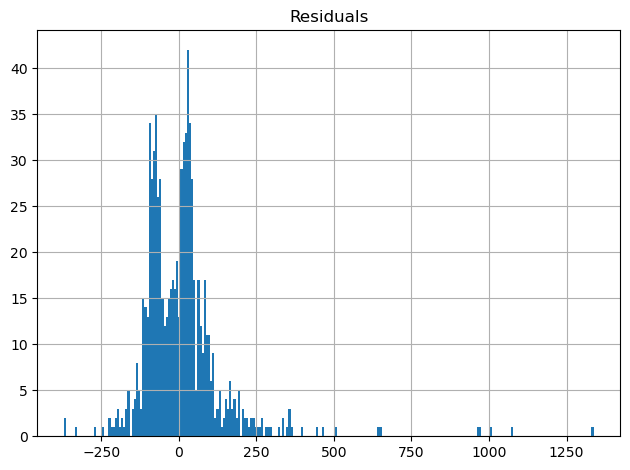

In [76]:
ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=250)

plt.tight_layout()
plt.show()